# Henrich's Tasmania Model 
from 'Demography and Cultural Evolution: How Adaptive Cultural Processes can Produce Maladaptive Losses: The Tasmanian Case'

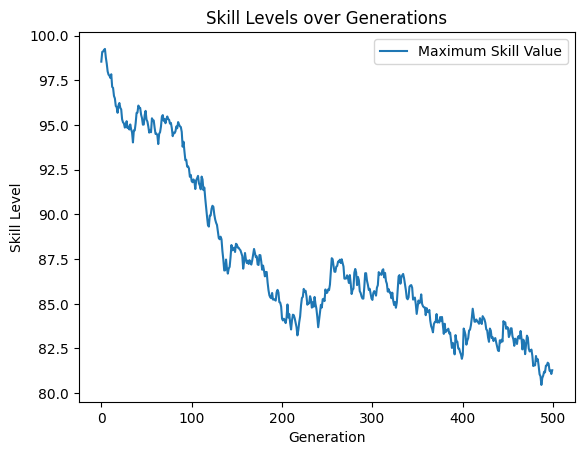

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the parameters for the distribution
N = 400  # Number of agents in the population
generations = 500  # Number of generations

# Generate the initial skills for the first generation
skills = np.random.uniform(low=0, high=100, size=num_agents)

# Track the maximum skill value for each generation
max_skills = []

# Perform the copying process for each generation
for generation in range(generations):

    # Determine the target 
    target = max(skills)
    
    max_skills.append(target)  # Track the maximum skill value
    
    # in the original model, Henrich used a Gumbel distribuation
    # I have provided code for that below, but first let's just play with a Normal distribution
    # it doesn't have quite right properties for us, but do you get the intuition what this captures? 

    skills = np.random.normal(loc=target - 3, scale=1, size = N)

    # Generate a random value from the Gumbel distribution
    # The Gumbel distribution is characterized by two parameters: loc (location) and scale. 
    # The loc parameter sets the location or position of the distribution's mode, 
    # # while the scale parameter controls the spread or dispersion of the distribution.
    # skills = np.random.gumbel(loc=target-deviance, scale=dispersion, size=N)


# Plot the skill levels as a function of generation
plt.plot(range(generations), max_skills, label='Maximum Skill Value')
plt.xlabel('Generation')
plt.ylabel('Skill Level')
plt.title('Skill Levels over Generations')
plt.legend()
plt.show()

In [169]:
def henrich_model(N, generations, dispersion, deviance):

    # Generate the initial skills for the first generation
    skills = np.random.uniform(low=0, high=100, size=N)

    # Track the maximum skill value for each generation
    max_skills = []

    # Perform the copying process for each generation
    for generation in range(generations):
        # Determine the target for the Gumbel distribution in this generation
        target = max(skills)
        
        max_skills.append(target)  # Track the maximum skill value

        # in the original model, Henrich used a Gumbel distribuation
        # I have provided code for that below, but first let's just play with a Normal distribution

        skills = np.random.normal(loc=target - deviance, scale=dispersion, size=N)

        # Generate a random value from the Gumbel distribution
        # The Gumbel distribution is characterized by two parameters: loc (location) and scale. 
        # The loc parameter sets the location or position of the distribution's mode, 
        # # while the scale parameter controls the spread or dispersion of the distribution.
        # skills = np.random.gumbel(loc=target-deviance, scale=dispersion, size=N)

    return max_skills

# model exploration


In [154]:
# look what patterns result from different values for N 

Ns = range(50, 550, 50)
henrich = {}
for N in Ns:
    henrich[N] = henrich_model(N, 100, dispersion = 1, deviance = 3)

# plotting

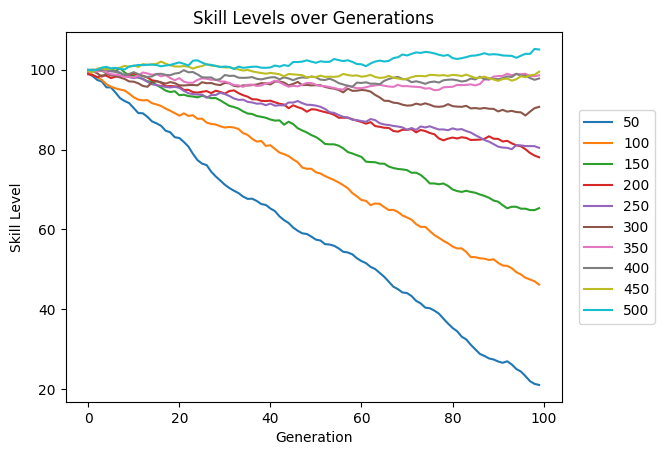

In [155]:
# Plot each list in the dictionary as a line plot
for key, values in henrich.items():
    sns.lineplot(x=range(len(values)), y=values, label=key)

# Set x and y labels
plt.xlabel('Generation')
plt.ylabel('Skill Level')
plt.title('Skill Levels over Generations')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')

# Show the plot
plt.show()

# Assumptions about underlying distributions: Normal vs Gumbel

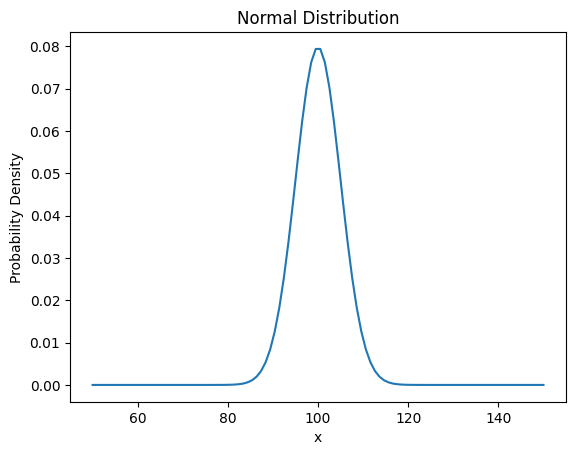

In [89]:
# if you want to play around with Normal distributions: 
from scipy.stats import norm

 # Generate data for x-axis
x = np.linspace(50, 150, 100)

 # Generate probability density function (PDF) values for the normal distribution
y = norm.pdf(x, 100, 5)  # mean=100, standard deviation=5

 # Plot the normal distribution
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.show()

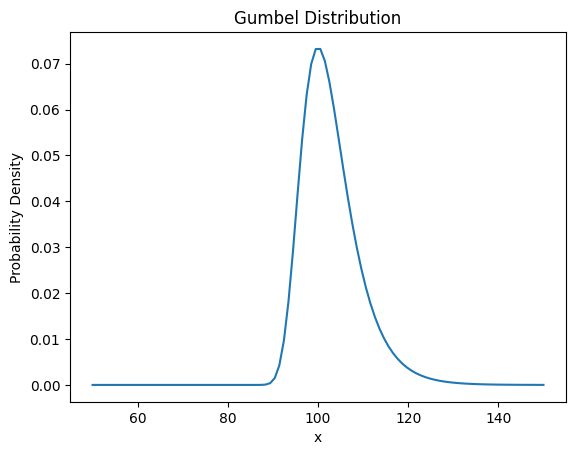

In [176]:
# if you want to play around with the (right-skewed) Gumbel distributions: 
from scipy.stats import gumbel_r

 # Generate data for x-axis
x = np.linspace(50, 150, 100)

 # Generate probability density function (PDF) values for the normal distribution
y = gumbel_r.pdf(x, 100, 5)  # mode = 100, spread = 5

 # Plot the normal distribution
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gumbel Distribution')
plt.show()